# What really contributes into someone's success in school?

Growing up there are countless factors that can hurt or help a student's performance in school. Ranging from a parent's involvement in the student's life, to the aspirations of the students themself.

Let's see how the students fared in this secondary-school math course.

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
#Machine Learning 
import sklearn
from sklearn.model_selection import train_test_split
#Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
#Tools for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Problem

In this case our problem is a binary classification problem.

We will change the grades from the students to be either passing or failing (two options).


# Creating pandas dataframe

In [2]:
df = pd.read_csv('students.csv')
#Peaking the top view of the dataset
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


We have a lot of columns, it's too many to show! We will need to do some cleanup to get rid of unnecessary ones.

Here's what all of the column names mean.

## Attributes
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no
)
22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)


In [3]:
df.shape

(649, 33)

# Data Exploration

Let's take a deeper look at the data to see what features we want to use, and gather information about the dataset.

In [4]:
#Lets first change the scores from a 20 point system, to pass or fail
#0 Being fail, 1 being pass
df.loc[df['G3'] < 13, 'G3'] = 0
df.loc[df['G3'] >= 13, 'G3'] = 1

In [5]:
#Our data seems fairly balanced here, between passing and failing.
df['G3'].value_counts()

0    373
1    276
Name: G3, dtype: int64

Text(0, 0.5, 'Number of Students')

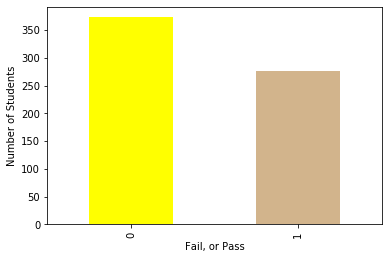

In [6]:
df['G3'].value_counts().plot(kind='bar', color=['yellow', 'tan']);
plt.xlabel('Fail, or Pass')
plt.ylabel('Number of Students')

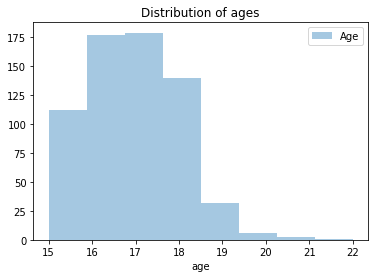

In [7]:
#Showing the range of ages in our dataset
sns.distplot(df['age'], hist=True, bins=8, kde=False, label='Age')
plt.legend()
plt.title('Distribution of ages')
plt.show()

In [8]:
#Changing all yesses to 1s, nos to 0s for label encoding
df = df.replace(to_replace = "yes", value = 1)
df = df.replace(to_replace = "no", value = 0)

In [9]:
df = df.rename(columns={"G3": "target"})
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,target
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,0


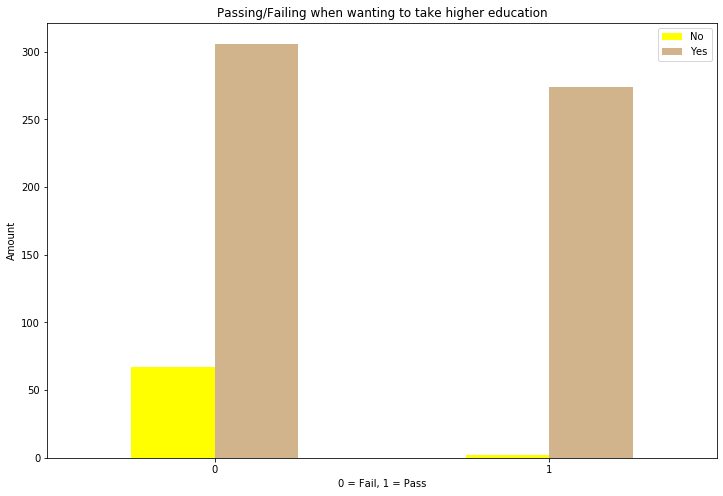

In [10]:
#Cross referencing the student's wllingness to go to higher education, and the pass/fail rate.
pd.crosstab(df['target'], df['higher']).plot(kind='bar', figsize=(12, 8), color=['yellow', 'tan'])
plt.title('Passing/Failing when wanting to take higher education')
plt.xlabel('0 = Fail, 1 = Pass')
plt.ylabel('Amount')
plt.legend(['No', 'Yes']);
plt.xticks(rotation=0);

This is interesting, almost everybody who passed wants to take higher education.

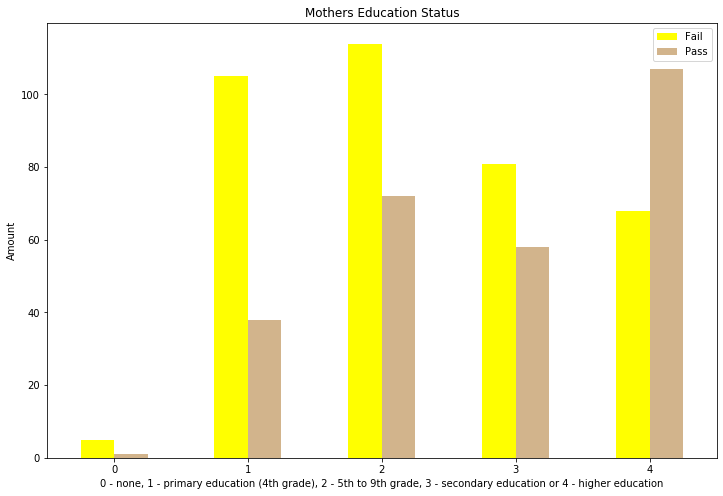

In [11]:
#Cross referencing the mothers education and the student's pass/fail rate
pd.crosstab(df['Medu'], df['target']).plot(kind='bar', figsize=(12, 8), color=['yellow', 'tan'])
plt.title('Mothers Education Status')
plt.xlabel('0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education')
plt.ylabel('Amount')
plt.legend(['Fail', 'Pass']);
plt.xticks(rotation=0);

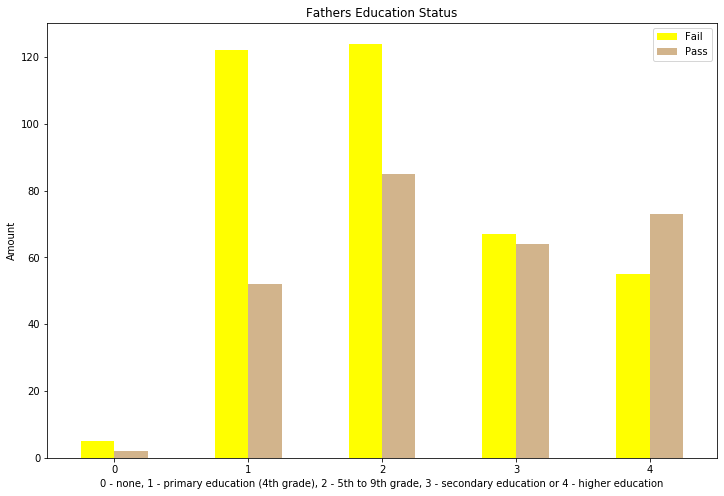

In [12]:
#Cross referencing the fathers education and the student's pass/fail rate
pd.crosstab(df['Fedu'], df['target']).plot(kind='bar', figsize=(12, 8), color=['yellow', 'tan'])
plt.title('Fathers Education Status')
plt.xlabel('0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education')
plt.ylabel('Amount')
plt.legend(['Fail', 'Pass']);
plt.xticks(rotation=0);

Another expected, yet interesting trend. The higher the education of the parents, the better the child's pass/fail rate is.

## Removing some features

Let's remove some unneccessary features before we make our correlation heat map, and test/train our data.

These features include things like addresses, school and alcohol consumption. Things I feel aren't huge contributors to someone's success in school.

In [13]:
df = df.drop(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'romantic', 'Dalc', 'Walc', 'G1', 'G2'], axis=1)

In [14]:
#Cross referencing G3(target, pass or fail) and amonut of study time per week.
pd.crosstab(df['target'], df['studytime'])

studytime,1,2,3,4
target,,,,
0,155,166,35,17
1,57,139,62,18


Looks like if you don't study, you are more likely to fail! Not surprising again.

Let's take a look at how absences affect the student's passing or failing.

In [15]:
pd.crosstab(df['target'], df['absences'])

absences,0,1,2,3,4,5,6,7,8,9,...,14,15,16,18,21,22,24,26,30,32
target,,,,,,,,,,,,,,,,,,,,,
0,119,6,63,5,56,8,27,1,29,6,...,7,2,10,1,1,2,1,1,0,0
1,125,6,47,2,37,4,22,2,13,1,...,1,0,0,2,1,0,0,0,1,1


We can see that one of the few columns (besides the outliers) where there are more students passing than failing,
is when the students had 0 absences.

## Correlation Matrix

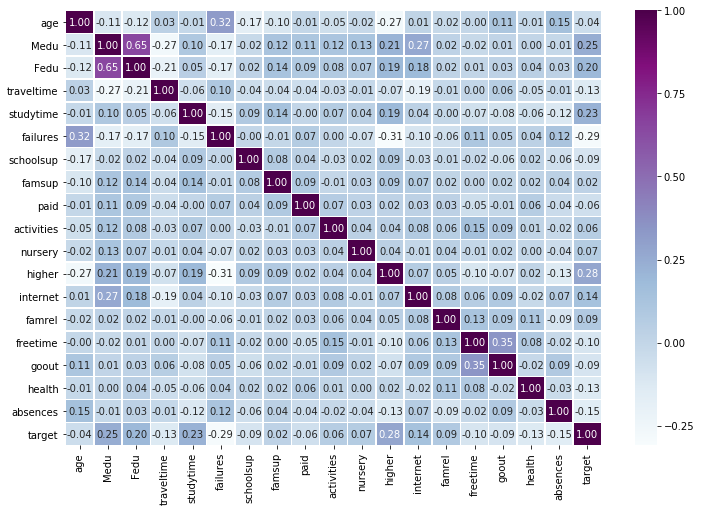

In [16]:
matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(matrix, annot=True, linewidths=0.5, fmt='.2f',cmap='BuPu');

The highest correlated features to the target are Mother's Education, Father's Education, Study Time, and the willingness to study higher education.

Another thing not related to the data, is that there is a very strong correlation between a Mother and Father's education.